<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
plt.style.use('ggplot')
import tensorflow as tf
print(tf.__version__)

2.2.0


In [16]:
main_folder='/content/drive/My Drive/Final_Project/'
images_folder=main_folder + 'face/'
EXAMPLE_PIC = images_folder + '000001.jpg'
IMG_WIDTH=178
IMG_HEIGHT=218
BATCH_SIZE = 16
NUM_EPOCHS = 20
df_attr=pd.read_excel(main_folder+'gender_dataset.xlsx',)

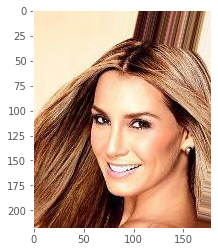

In [17]:
img=load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)

In [18]:
datagen =  ImageDataGenerator(
  #preprocessing_function=preprocess_input,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

In [19]:
df_attr.groupby(['Male']).size()

Male
0    1154
1     846
dtype: int64

In [20]:
def load_resize(fname):
    img=cv2.imread(fname)
    img=cv2.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(IMG_WIDTH,IMG_HEIGHT)).astype(np.float32)/255.0
    return img 

In [ ]:
arr_image=[]
for fname in df_attr['Id_image']:
   x= load_resize(images_folder + fname)
   arr_image.append(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train=np.array(arr_image[0:1001])
x_train=x_train.reshape(x_train.shape[0],116412)
y_train=df_attr['Male'][0:1001]
x_valid=np.array(arr_image[1000:1501])
x_valid=x_valid.reshape(x_valid.shape[0],116412)
y_valid=df_attr['Male'][1000:1501]
x_test=np.array(arr_image[1500:2000])
x_test=x_test.reshape(x_test.shape[0],116412)
y_test=df_attr['Male'][1500:2000]

In [ ]:
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)

In [ ]:
y_predict=model.predict(x_valid)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_predict)